In [85]:
import pandas as pd
data = pd.read_csv('data-preprocessed.csv')

C:\Users\Yasmin\AppData\Local\Temp\ipykernel_46508\1738446671.py:2: DtypeWarning: Columns (30,31,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data-preprocessed.csv')


In [86]:
sett = {i:set() for i in range(20000)} #just getting all the unique sessions together
set_of_unique_items = set() #unique filters used

In [87]:
columns_to_remove = ['filters[0][field]', 'filters[0][type]', 'filters[1][field]', 'filters[1][type]', 'filters[2][field]', 'filters[2][type]', 'current', 'sort-field', 'sort-direction']

In [88]:
for i in range(len(data)):
    session_id = data.iloc[i].session_id
    fields = data.iloc[i][9:].dropna().drop(columns_to_remove, errors='ignore') #series of filters
    for j in range(len(fields)):
        item = fields[j][2:-2] #item is filter
        sett[session_id].add(item)
        set_of_unique_items.add(item)

In [89]:
d = dict()
for item in set_of_unique_items:
    d[item] = 0
for i in range(len(sett)): #just to count how many times each filter was used
    fields = sett[i]
    for item in fields:
        d[item] += 1

In [90]:
sorted_d = sorted(d.items(), key=lambda x:x[1], reverse=True)
filtered_d = filter(lambda x: x[1]>=200,sorted_d) #only use filters with more than 200 people using it
filters_for_table = dict(filtered_d).keys()
table = pd.DataFrame(0, index=filters_for_table, columns=filters_for_table)
print(table)

                                           Banking and Finance  \
Banking and Finance                                          0   
Information and Communications Technology                    0   
Consultancy                                                  0   
Data Science                                                 0   
Google                                                       0   
Healthcare                                                   0   
Venture Capital and Startups                                 0   
National University of Singapore                             0   
Citibank                                                     0   
Legal                                                        0   
Media                                                        0   
Boston Consulting Group                                      0   
Human Resource                                               0   
Arts, Entertainment and Recreation                           0   
Social Imp

In [91]:
shallow = sett.copy()
for i in range(len(shallow)):
    session = list(shallow[i])
    for item in session[::-1]: #remove unneeded filters
        if item not in list(filters_for_table): 
            session.remove(item)
    end=len(session)
    if end > 0:
        for i in range(end-1):
            row = session[i]
            for j in range(i+1,end):
                column = session[j]
                table.loc[row, column]+=1 #finish making the table!

print(table)

                                           Banking and Finance  \
Banking and Finance                                          0   
Information and Communications Technology                  172   
Consultancy                                                238   
Data Science                                               150   
Google                                                      83   
Healthcare                                                  55   
Venture Capital and Startups                               206   
National University of Singapore                            87   
Citibank                                                   145   
Legal                                                       55   
Media                                                       29   
Boston Consulting Group                                     55   
Human Resource                                              61   
Arts, Entertainment and Recreation                          21   
Social Imp

In [92]:
table.style

,Banking and Finance,Information and Communications Technology,Consultancy,Data Science,Google,Healthcare,Venture Capital and Startups,National University of Singapore,Citibank,Legal,Media,Boston Consulting Group,Human Resource,"Arts, Entertainment and Recreation",Social Impact,GIC,Climate Change,Computer Science
Banking and Finance,0,7,17,8,0,2,6,0,15,3,3,7,4,4,12,0,9,4
Information and Communications Technology,172,0,157,179,33,35,69,0,68,32,40,27,36,17,42,14,32,63
Consultancy,238,54,0,76,4,47,101,0,79,53,20,125,47,20,58,19,53,19
Data Science,150,62,49,0,20,3,43,3,1,10,0,6,1,0,16,0,6,7
Google,83,146,107,82,0,23,77,2,109,18,39,119,37,24,26,22,27,41
Healthcare,55,16,10,61,1,0,27,3,3,25,9,8,5,5,24,3,2,0
Venture Capital and Startups,206,58,40,48,5,13,0,4,23,10,10,4,9,9,19,16,15,3
National University of Singapore,87,78,69,55,64,61,39,0,36,21,20,29,28,8,25,8,20,29
Citibank,145,0,4,40,0,12,37,2,0,6,2,48,21,2,6,0,9,8
Legal,55,8,1,5,0,1,29,0,8,0,6,2,3,1,24,5,1,0


for testing 
<br><br><br><br><br><br><br><br><br><br><br><br><br>

In [2]:
data

,view_id,website_id,session_id,created_at,url,referrer,query_params,q,size,filters[0][field],...,filters[0][values][8],filters[0][values][9],_sm_au_,v,fbclid,filters[3][field],trk,filters[3][values][0],filters[3][values][1],amp;amp;size
0,233,2,93,2022-05-24 01:43:25.814+00,/?q=chemical&size=n_20_n,NaN,"{'q': ['chemical'], 'size': ['n_20_n']}",['chemical'],['n_20_n'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,234,2,94,2022-05-24 01:45:16.891+00,/,NaN,{},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,235,2,94,2022-05-24 01:45:17.571+00,/?size=n_20_n,/,{'size': ['n_20_n']},NaN,['n_20_n'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,236,2,94,2022-05-24 01:46:04.09+00,/?size=n_20_n&filters%5B0%5D%5Bfield%5D=indust...,/?size=n_20_n,"{'size': ['n_20_n'], 'filters[0][field]': ['in...",NaN,['n_20_n'],['industries'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,237,2,94,2022-05-24 01:46:10.66+00,/?size=n_20_n&filters%5B0%5D%5Bfield%5D=indust...,/?size=n_20_n&filters%5B0%5D%5Bfield%5D=indust...,"{'size': ['n_20_n'], 'filters[0][field]': ['in...",NaN,['n_20_n'],['industries'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113584,113814,1,16139,2023-04-24 14:18:54.34+00,/,https://static.elfsight.com/,{},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113585,113815,1,16139,2023-04-24 14:51:55.512+00,/events/,https://beta.advisory.sg/,{},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113586,113816,1,16139,2023-04-24 14:52:04.993+00,/press-releases/,NaN,{},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113587,113817,1,16140,2023-04-24 16:38:43.474+00,/2017/10/05/conversations-with-tee-chee-yen/,http://localhost:2368/,{},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
for i in range(len(data)):
    if len(data.iloc[i][9:].dropna())>9:
        print(data.iloc[i][9:].dropna())

filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][type]                             ['any']
filters[1][values][1]                      ['Bain ']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                     ['Ernst ']
filters[1][values][4]                    ['Kearney']
Name: 388, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                      ['Bain ']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                     ['Ernst ']
filters[1][values][4]

filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][type]                             ['any']
filters[1][values][1]                  ['McKinsey ']
filters[1][values][2]                     ['Google']
filters[1][values][3]                      ['Bain ']
filters[1][values][4]                   ['Citibank']
Name: 910, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][type]                             ['any']
filters[1][values][1]                  ['McKinsey ']
filters[1][values][2]                     ['Google']
filters[1][values][3]

filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][type]                             ['any']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                  ['Deloitte ']
filters[1][values][4]                      ['Bain ']
Name: 1432, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                  ['Deloitte ']
filters[1][values][4

filters[0][field]                                  ['school']
filters[0][values][0]    ['Nanyang Technological University']
filters[0][type]                                      ['any']
filters[0][values][1]    ['National University of Singapore']
filters[1][field]                              ['industries']
filters[1][values][0]                       ['Data Science ']
filters[1][type]                                      ['all']
filters[2][field]                            ['organisation']
filters[2][values][0]                                ['Grab']
filters[2][values][1]                            ['DBS Bank']
Name: 1702, dtype: object
filters[0][field]                                  ['school']
filters[0][values][0]    ['Nanyang Technological University']
filters[0][type]                                      ['any']
filters[0][values][1]    ['National University of Singapore']
filters[1][field]                              ['industries']
filters[1][values][0]                       

filters[0][field]                ['industries']
filters[0][values][0]            ['Healthcare']
filters[0][type]                        ['all']
filters[0][values][1]    ['Biopharmaceuticals']
filters[1][field]              ['organisation']
filters[1][values][0]              ['Novartis']
filters[1][type]                        ['any']
filters[1][values][1]                 ['Roche']
filters[1][values][2]                   ['GSK']
filters[1][values][3]                 ['Bayer']
Name: 2190, dtype: object
filters[0][field]                        ['industries']
filters[0][values][0]                    ['Healthcare']
filters[0][type]                                ['all']
filters[0][values][1]            ['Biopharmaceuticals']
filters[1][field]                      ['organisation']
filters[1][values][0]                      ['Novartis']
filters[1][type]                                ['any']
filters[1][values][1]                         ['Roche']
filters[1][values][2]                         

filters[0][field]                                      ['industries']
filters[0][values][0]                                   ['Logistics']
filters[0][type]                                              ['all']
filters[1][field]                                    ['organisation']
filters[1][values][0]                                 ['DB Schenker']
filters[1][type]                                              ['any']
filters[1][values][1]    ['Maritime and Port Authority of Singapore']
filters[1][values][2]                         ['PSA Corporation Ltd']
filters[1][values][3]                           ['PSA International']
filters[1][values][4]                                    ['Procter ']
Name: 3517, dtype: object
filters[0][field]                                      ['industries']
filters[0][values][0]                                   ['Logistics']
filters[0][type]                                              ['all']
filters[1][field]                                    ['organisat

filters[0][field]                             ['industries']
filters[0][values][0]                ['Banking and Finance']
filters[0][type]                                     ['all']
current                                            ['n_3_n']
filters[1][field]                           ['organisation']
filters[1][values][0]                                ['GIC']
filters[1][type]                                     ['any']
filters[1][values][1]    ['Monetary Authority of Singapore']
filters[1][values][2]                ['GIC Private Limited']
filters[1][values][3]                        ['BNP Paribas']
filters[1][values][4]                           ['Citibank']
Name: 4422, dtype: object
filters[0][field]                             ['industries']
filters[0][values][0]                ['Banking and Finance']
filters[0][type]                                     ['all']
current                                            ['n_4_n']
filters[1][field]                           ['organisation'

filters[0][field]                                       ['industries']
filters[0][values][0]    ['Information and Communications Technology']
filters[0][type]                                               ['all']
filters[1][field]                                     ['organisation']
filters[1][values][0]                                       ['Google']
filters[1][type]                                               ['any']
filters[1][values][1]                                   ['Salesforce']
filters[1][values][2]                                       ['Shopee']
filters[1][values][3]                          ['Amazon Web Services']
filters[2][field]                                  ['course_of_study']
filters[2][values][0]                                    ['Computer%']
Name: 5237, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                 

filters[0][field]                                       ['industries']
filters[0][values][0]    ['Information and Communications Technology']
filters[0][type]                                               ['all']
current                                                      ['n_3_n']
filters[1][field]                                     ['organisation']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                         ['Meta']
filters[1][values][2]                                     ['Facebook']
filters[1][values][3]                                     ['LinkedIn']
filters[1][values][4]                                    ['Microsoft']
filters[1][values][5]                                        ['Apple']
filters[1][values][6]                                            ['A']
Name: 5667, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]             ['Human Resource']
filters[0][type]

filters[0][field]                     ['industries']
filters[0][values][0]        ['Banking and Finance']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]         ['Standard Chartered']
filters[1][values][3]                ['BNP Paribas']
filters[1][values][4]                  ['OCBC Bank']
filters[1][values][5]        ['GIC Private Limited']
Name: 6813, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]        ['Banking and Finance']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]         ['Standard Chartered']
filters[1][values][3]                ['BNP Paribas']
filters[1][values][4

filters[0][field]                      ['industries']
filters[0][values][0]          ['Biopharmaceuticals']
filters[0][type]                              ['all']
filters[1][field]                    ['organisation']
filters[1][values][0]                         ['GIC']
filters[1][values][1]                         ['GSK']
filters[1][values][2]                    ['Illumina']
filters[1][values][3]                       ['Roche']
filters[1][values][4]    ['Thermo Fisher Scientific']
filters[1][values][5]     ['thermofisher scientific']
filters[1][values][6]                       ['Bayer']
Name: 7363, dtype: object
filters[0][field]                                ['organisation']
filters[0][values][0]                                ['Citibank']
filters[0][values][1]                                  ['Google']
filters[0][values][2]                 ['Standard Chartered Bank']
filters[0][values][3]                 ['Boston Consulting Group']
filters[0][values][4]                             

filters[0][field]                              ['industries']
filters[0][values][0]                          ['Healthcare']
filters[0][type]                                      ['all']
filters[1][field]                            ['organisation']
filters[1][values][0]              ['Tan Tock Seng Hospital']
filters[1][type]                                      ['any']
filters[1][values][1]                        ['Coopervision']
filters[1][values][2]            ['Central Narcotics Bureau']
filters[1][values][3]    ['Duke-NUS Graduate Medical School']
filters[1][values][4]                ['Hello Doctor Pvt Ltd']
Name: 7854, dtype: object
filters[0][field]                              ['industries']
filters[0][values][0]                          ['Healthcare']
filters[0][type]                                      ['all']
filters[1][field]                            ['organisation']
filters[1][values][0]              ['Tan Tock Seng Hospital']
filters[1][type]                            

filters[0][field]                 ['industries']
filters[0][values][0]    ['Banking and Finance']
filters[0][type]                         ['all']
filters[1][field]               ['organisation']
filters[1][values][0]                    ['GIC']
filters[1][type]                         ['any']
filters[1][values][1]    ['GIC Private Limited']
filters[1][values][2]            ['BNP Paribas']
filters[1][values][3]               ['Citibank']
filters[1][values][4]        ['Bank of America']
Name: 8907, dtype: object
filters[0][field]                           ['industries']
filters[0][values][0]              ['Banking and Finance']
filters[0][type]                                   ['all']
filters[1][field]                         ['organisation']
filters[1][values][0]                              ['GIC']
filters[1][values][1]              ['GIC Private Limited']
filters[1][values][2]                      ['BNP Paribas']
filters[1][values][3]                         ['Citibank']
filters[1][v

filters[0][field]                                           ['industries']
filters[0][values][0]                                            ['Media']
filters[0][type]                                                   ['all']
filters[1][field]                                         ['organisation']
filters[1][values][0]                                  ['Sport Singapore']
filters[1][type]                                                   ['any']
filters[1][values][1]                                           ['TikTok']
filters[1][values][2]    ['Hungama Digital Media Entertainment Private ...
filters[1][values][3]                                          ['ICHIGEN']
filters[1][values][4]                               ['IN10 Media Network']
Name: 10131, dtype: object
filters[0][field]                             ['industries']
filters[0][values][0]                         ['Healthcare']
filters[0][type]                                     ['all']
filters[0][values][1]                 ['

filters[0][field]                                        ['school']
filters[0][values][0]          ['National University of Singapore']
filters[0][type]                                            ['any']
filters[1][field]                               ['course_of_study']
filters[1][values][0]                   ['Business Administration']
filters[1][type]                                            ['any']
filters[1][values][1]                  ['International Management']
filters[1][values][2]    ['Business Administration and Management']
filters[2][field]                                  ['organisation']
filters[2][values][0]                                      ['Grab']
Name: 11575, dtype: object
filters[0][field]                                        ['school']
filters[0][values][0]          ['National University of Singapore']
filters[0][type]                                            ['any']
filters[1][field]                               ['course_of_study']
filters[1][values][0]

filters[0][field]                             ['industries']
filters[0][values][0]                     ['Social Impact ']
filters[0][type]                                     ['all']
filters[1][field]                        ['course_of_study']
filters[1][values][0]            ['Business Administration']
filters[1][type]                                     ['any']
filters[1][values][1]                          ['Sociology']
filters[1][values][2]                           ['Business']
filters[1][values][3]    ['Business Management (Marketing)']
filters[1][values][4]                          ['Marketing']
Name: 11982, dtype: object
filters[0][field]                             ['industries']
filters[0][values][0]                     ['Social Impact ']
filters[0][type]                                     ['all']
filters[1][field]                        ['course_of_study']
filters[1][values][0]            ['Business Administration']
filters[1][type]                                     ['any

filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
current                                    ['n_4_n']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                     ['Ernst ']
filters[1][values][3]                  ['Accenture']
filters[1][values][4]                      ['Bain ']
filters[1][values][5]        ['Deloitte Consulting']
Name: 12255, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
current                                    ['n_3_n']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][

filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                      ['Bain ']
filters[1][values][3]                  ['McKinsey ']
filters[1][values][4]                ['A.T.Kearney']
filters[1][values][5]               ['A.T. Kearney']
Name: 12902, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                      ['Bain ']
filters[1][values][3]                  ['McKinsey ']
filters[1][values][

filters[0][field]                          ['industries']
filters[0][values][0]             ['Banking and Finance']
filters[0][type]                                  ['all']
filters[0][values][1]    ['Venture Capital and Startups']
filters[1][field]                     ['course_of_study']
filters[1][values][0]         ['Business Administration']
filters[1][type]                                  ['any']
filters[1][values][1]            ['Accountancy, Finance']
filters[1][values][2]             ['Banking and Finance']
filters[1][values][3]                       ['Economics']
Name: 13410, dtype: object
filters[0][field]                          ['industries']
filters[0][values][0]             ['Banking and Finance']
filters[0][type]                                  ['all']
filters[0][values][1]    ['Venture Capital and Startups']
filters[1][field]                     ['course_of_study']
filters[1][values][0]         ['Business Administration']
filters[1][type]                             

filters[0][field]               ['organisation']
filters[0][values][0]                    ['SAP']
filters[0][type]                         ['any']
filters[0][values][1]               ['SAP Asia']
filters[0][values][2]                 ['Lazada']
filters[0][values][3]             ['Salesforce']
filters[0][values][4]    ['Amazon Web Services']
filters[0][values][5]              ['Microsoft']
filters[0][values][6]                 ['VMware']
filters[0][values][7]                 ['Amazon']
Name: 13901, dtype: object
filters[0][field]               ['organisation']
filters[0][values][0]                    ['SAP']
filters[0][type]                         ['any']
filters[0][values][1]               ['SAP Asia']
filters[0][values][2]                 ['Lazada']
filters[0][values][3]             ['Salesforce']
filters[0][values][4]    ['Amazon Web Services']
filters[0][values][5]              ['Microsoft']
filters[0][values][6]                 ['VMware']
filters[0][values][7]                 ['Am

filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][type]                             ['any']
filters[1][values][1]                     ['Google']
filters[1][values][2]                    ['Kearney']
filters[1][values][3]                     ['Ernst ']
filters[1][values][4]                  ['Accenture']
Name: 14547, dtype: object
filters[0][field]                     ['industries']
filters[0][values][0]                ['Consultancy']
filters[0][type]                             ['all']
filters[1][field]                   ['organisation']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][type]                             ['any']
filters[1][values][1]                     ['Google']
filters[1][values][2]                    ['Kearney']
filters[1][values][

filters[0][field]         ['organisation']
filters[0][values][0]           ['Google']
filters[0][values][1]              ['SAP']
filters[0][values][2]             ['Meta']
filters[0][values][3]       ['Salesforce']
filters[0][values][4]    ['Credit Suisse']
filters[0][values][5]        ['Ninja Van']
filters[0][values][6]          ['Hubspot']
filters[0][values][7]      ['Crowdstrike']
filters[0][values][8]           ['VMware']
filters[0][values][9]         ['Facebook']
Name: 14903, dtype: object
filters[0][field]         ['organisation']
filters[0][values][0]           ['Google']
filters[0][values][1]              ['SAP']
filters[0][values][2]             ['Meta']
filters[0][values][3]       ['Salesforce']
filters[0][values][4]    ['Credit Suisse']
filters[0][values][5]        ['Ninja Van']
filters[0][values][6]          ['Hubspot']
filters[0][values][7]      ['Crowdstrike']
filters[0][values][8]           ['VMware']
filters[0][values][9]         ['Facebook']
Name: 14911, dtype: object


filters[0][field]                                       ['industries']
filters[0][values][0]    ['Information and Communications Technology']
filters[0][type]                                               ['all']
current                                                      ['n_2_n']
filters[1][field]                                  ['course_of_study']
filters[1][values][0]                       ['Information Technology']
filters[1][values][1]                         ['Software Engineering']
filters[1][values][2]        ['Information Systems, Computer Science']
filters[1][values][3]                                     ['Business']
filters[1][values][4]                                    ['Business%']
Name: 15434, dtype: object
filters[0][field]                 ['industries']
filters[0][values][0]             ['Healthcare']
filters[0][type]                         ['all']
filters[1][field]            ['course_of_study']
filters[1][values][0]               ['Medicine']
filters[1][type]  

filters[0][field]                              ['industries']
filters[0][values][0]                 ['Banking and Finance']
filters[0][type]                                      ['all']
filters[1][field]                         ['course_of_study']
filters[1][values][0]                    ['Computer Science']
filters[1][type]                                      ['any']
filters[1][values][1]    ['Computer Science and Engineering']
filters[1][values][2]              ['Mechanical Engineering']
filters[1][values][3]              ['Electrical Engineering']
filters[1][values][4]                           ['Computing']
Name: 16496, dtype: object
filters[0][field]                              ['industries']
filters[0][values][0]                 ['Banking and Finance']
filters[0][type]                                      ['all']
current                                             ['n_2_n']
filters[1][field]                         ['course_of_study']
filters[1][values][0]                    ['

KeyboardInterrupt: 

In [6]:
for i in range(len(data)):
    if len(data.iloc[i][9:].dropna())>9:
        print(data.iloc[i][9:].dropna().drop(columns_to_remove, errors='ignore'))

filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                      ['Bain ']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                     ['Ernst ']
filters[1][values][4]                    ['Kearney']
Name: 388, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                      ['Bain ']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                     ['Ernst ']
filters[1][values][4]                    ['Kearney']
filters[1][values][5]        ['Deloitte Consulting']
Name: 389, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                      ['Bain ']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                     ['Ernst

filters[0][values][0]                          ['Healthcare']
filters[1][values][0]                  ['Ministry of Health']
filters[1][values][1]              ['Tan Tock Seng Hospital']
filters[1][values][2]    ['National University of Singapore']
filters[1][values][3]                                 ['GSK']
filters[1][values][4]                      ['IHH Healthcare']
filters[1][values][5]                            ['Johnson ']
Name: 982, dtype: object
filters[0][values][0]                          ['Healthcare']
filters[1][values][0]                  ['Ministry of Health']
filters[1][values][1]              ['Tan Tock Seng Hospital']
filters[1][values][2]    ['National University of Singapore']
filters[1][values][3]                                 ['GSK']
filters[1][values][4]                      ['IHH Healthcare']
filters[1][values][5]                            ['Johnson ']
Name: 983, dtype: object
filters[0][values][0]                          ['Healthcare']
filters[1][values][0

filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                  ['Consultancy']
filters[0][values][2]                                  ['Advertising']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                        ['Adobe']
filters[1][values][2]                                      ['Edelman']
Name: 1881, dtype: object
filters[0][values][0]            ['Healthcare']
filters[0][values][1]    ['Biopharmaceuticals']
filters[1][values][0]              ['Novartis']
filters[1][values][1]                 ['Roche']
filters[1][values][2]                   ['GSK']
filters[1][values][3]                 ['Bayer']
Name: 2190, dtype: object
filters[0][values][0]                    ['Healthcare']
filters[0][values][1]            ['Biopharmaceuticals']
filters[1][values][0]                      ['Novartis']
filters[1][values][1]                         ['Roche']
filters[1]

filters[0][values][0]                                   ['Logistics']
filters[1][values][0]                                 ['DB Schenker']
filters[1][values][1]    ['Maritime and Port Authority of Singapore']
filters[1][values][2]                         ['PSA Corporation Ltd']
filters[1][values][3]                           ['PSA International']
filters[1][values][4]                                    ['Procter ']
Name: 3517, dtype: object
filters[0][values][0]                                   ['Logistics']
filters[1][values][0]                                 ['DB Schenker']
filters[1][values][1]    ['Maritime and Port Authority of Singapore']
filters[1][values][2]                         ['PSA Corporation Ltd']
filters[1][values][3]                           ['PSA International']
filters[1][values][4]                                    ['Procter ']
filters[1][values][5]                                           ['S']
Name: 3518, dtype: object
filters[0][values][0]                 

filters[0][values][0]    ['Information and Communications Technology']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                   ['Salesforce']
filters[1][values][2]                                       ['Shopee']
filters[1][values][3]                          ['Amazon Web Services']
filters[2][values][0]                                    ['Computer%']
Name: 5237, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                     ['Google']
filters[1][values][3]                  ['Accenture']
filters[1][values][4]                      ['Bain ']
Name: 5473, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                     ['G

filters[0][values][0]              ['Data Science ']
filters[0][values][1]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]                        ['DBS']
filters[1][values][3]                ['BNP Paribas']
filters[1][values][4]    ['Bank of New York Mellon']
Name: 6258, dtype: object
filters[0][values][0]              ['Data Science ']
filters[0][values][1]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]                        ['DBS']
filters[1][values][3]                ['BNP Paribas']
filters[1][values][4]    ['Bank of New York Mellon']
Name: 6259, dtype: object
filters[0][values][0]              ['Data Science ']
filters[0][values][1]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered B

filters[0][values][0]                   ['Google']
filters[0][values][1]                   ['TikTok']
filters[0][values][2]                       ['3M']
filters[0][values][3]         ['Channel NewsAsia']
filters[0][values][4]    ['Bloomberg Media, Asia']
filters[0][values][5]             ['Bloomberg LP']
filters[0][values][6]              ['BBC Studios']
filters[0][values][7]               ['Bumble Inc']
Name: 6884, dtype: object
filters[0][values][0]                   ['Google']
filters[0][values][1]                   ['TikTok']
filters[0][values][2]                       ['3M']
sort-field                                ['name']
sort-direction                             ['asc']
filters[0][values][3]         ['Channel NewsAsia']
filters[0][values][4]    ['Bloomberg Media, Asia']
filters[0][values][5]             ['Bloomberg LP']
filters[0][values][6]              ['BBC Studios']
filters[0][values][7]               ['Bumble Inc']
Name: 6885, dtype: object
filters[0][values][0]         

filters[0][values][0]                          ['Healthcare']
filters[1][values][0]              ['Tan Tock Seng Hospital']
filters[1][values][1]                        ['Coopervision']
filters[1][values][2]            ['Central Narcotics Bureau']
filters[1][values][3]    ['Duke-NUS Graduate Medical School']
filters[1][values][4]                ['Hello Doctor Pvt Ltd']
Name: 7854, dtype: object
filters[0][values][0]                          ['Healthcare']
filters[1][values][0]              ['Tan Tock Seng Hospital']
filters[1][values][1]                        ['Coopervision']
filters[1][values][2]            ['Central Narcotics Bureau']
filters[1][values][3]    ['Duke-NUS Graduate Medical School']
filters[1][values][4]                ['Hello Doctor Pvt Ltd']
Name: 7858, dtype: object
filters[0][values][0]              ['Banking and Finance']
filters[1][values][0]                    ['Deutsche Bank']
filters[1][values][1]           ['Fidelity International']
filters[1][values][2]      

filters[0][values][0]                         ['Retail']
filters[1][values][0]    ['LVMH Perfumes and Cosmetics']
filters[1][values][1]                         ['Google']
filters[1][values][2]     ['L’Oréal Travel Retail APAC']
filters[1][values][3]          ['Shiseido Asia Pacific']
filters[1][values][4]                 ['Shiseido Group']
Name: 9265, dtype: object
filters[0][values][0]                         ['Retail']
filters[1][values][0]    ['LVMH Perfumes and Cosmetics']
filters[1][values][1]                         ['Google']
filters[1][values][2]     ['L’Oréal Travel Retail APAC']
filters[1][values][3]          ['Shiseido Asia Pacific']
filters[1][values][4]                 ['Shiseido Group']
filters[1][values][5]                         ['Shisei']
Name: 9266, dtype: object
filters[0][values][0]                         ['Retail']
filters[1][values][0]    ['LVMH Perfumes and Cosmetics']
filters[1][values][1]                         ['Google']
filters[1][values][2]     ['L’Oréal 

filters[0][values][0]                                ['Citibank']
filters[0][values][1]                                  ['Google']
filters[0][values][2]                 ['Standard Chartered Bank']
filters[0][values][3]                 ['Boston Consulting Group']
filters[0][values][4]                                ['SAP Asia']
filters[0][values][5]                                     ['DBS']
filters[0][values][6]                                     ['GIC']
filters[0][values][7]    ['Singapore Economic Development Board']
filters[0][values][8]                                   ['Dyson']
Name: 11011, dtype: object
filters[0][values][0]    ['Boston Consulting Group']
filters[0][values][1]                   ['Citibank']
filters[0][values][2]    ['Standard Chartered Bank']
filters[0][values][3]                    ['Kearney']
filters[0][values][4]                        ['DBS']
filters[0][values][5]                   ['DBS Bank']
filters[0][values][6]               ['DBS Bank Ltd']
filters[

filters[0][values][0]          ['National University of Singapore']
filters[1][values][0]                   ['Business Administration']
filters[1][values][1]                  ['International Management']
filters[1][values][2]    ['Business Administration and Management']
filters[2][values][0]                                      ['Grab']
Name: 11575, dtype: object
filters[0][values][0]          ['National University of Singapore']
filters[1][values][0]                   ['Business Administration']
filters[1][values][1]                  ['International Management']
filters[1][values][2]    ['Business Administration and Management']
filters[2][values][0]                                      ['Grab']
Name: 11580, dtype: object
filters[0][values][0]          ['National University of Singapore']
filters[1][values][0]                   ['Business Administration']
filters[1][values][1]                  ['International Management']
filters[1][values][2]    ['Business Administration and Managem

filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                     ['Ernst ']
filters[1][values][3]                  ['Accenture']
filters[1][values][4]                      ['Bain ']
Name: 12209, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                     ['Ernst ']
filters[1][values][3]                  ['Accenture']
filters[1][values][4]                      ['Bain ']
filters[1][values][5]        ['Deloitte Consulting']
Name: 12210, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                     ['Ernst ']
filters[1][values][3]                  ['Acce

filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                      ['Bain ']
filters[1][values][3]                  ['McKinsey ']
filters[1][values][4]                ['A.T.Kearney']
filters[1][values][5]               ['A.T. Kearney']
Name: 12902, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                      ['Bain ']
filters[1][values][3]                  ['McKinsey ']
filters[1][values][4]                ['A.T.Kearney']
filters[1][values][5]               ['A.T. Kearney']
Name: 12903, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                      ['

filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]               ['Citibank']
filters[1][values][1]              ['OCBC Bank']
filters[1][values][2]     ['Standard Chartered']
filters[1][values][3]              ['Bloomberg']
filters[1][values][4]                    ['GIC']
Name: 13527, dtype: object
filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                  ['OCBC Bank']
filters[1][values][2]         ['Standard Chartered']
filters[1][values][3]                  ['Bloomberg']
filters[1][values][4]                        ['GIC']
filters[1][values][5]    ['Standard Chartered Bank']
Name: 13528, dtype: object
filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                  ['OCBC Bank']
filters[1][values][2]         ['Standard Chartered']
filters[1][values][3]                  ['Bloomberg']
filters[1][value

filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                     ['Google']
filters[1][values][2]    ['Standard Chartered Bank']
filters[1][values][3]                        ['GIC']
filters[1][values][4]              ['Credit Suisse']
filters[1][values][5]         ['Standard Chartered']
Name: 14149, dtype: object
filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                     ['Google']
filters[1][values][2]    ['Standard Chartered Bank']
filters[1][values][3]                        ['GIC']
filters[1][values][4]              ['Credit Suisse']
filters[1][values][5]         ['Standard Chartered']
Name: 14150, dtype: object
filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                  ['OCBC Bank']
filters[1][values][2]         ['Standard Char

filters[0][values][0]             ['Healthcare']
filters[1][values][0]               ['Medicine']
filters[1][values][1]      ['Medicine, Surgery']
filters[1][values][2]               ['Pharmacy']
filters[1][values][3]           ['Biochemistry']
filters[1][values][4]    ['Biological Sciences']
Name: 15498, dtype: object
filters[0][values][0]             ['Healthcare']
filters[1][values][0]               ['Medicine']
filters[1][values][1]      ['Medicine, Surgery']
filters[1][values][2]               ['Pharmacy']
filters[1][values][3]           ['Biochemistry']
filters[1][values][4]    ['Biological Sciences']
filters[1][values][5]     ['Biological Science']
Name: 15499, dtype: object
filters[0][values][0]             ['Healthcare']
filters[1][values][0]               ['Medicine']
filters[1][values][1]      ['Medicine, Surgery']
filters[1][values][2]               ['Pharmacy']
filters[1][values][3]           ['Biochemistry']
filters[1][values][4]    ['Biological Sciences']
filters[1][valu

filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                  ['OCBC Bank']
filters[1][values][2]         ['Standard Chartered']
filters[1][values][3]                  ['Bloomberg']
filters[1][values][4]    ['Standard Chartered Bank']
Name: 16950, dtype: object
filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                  ['OCBC Bank']
filters[1][values][2]         ['Standard Chartered']
filters[1][values][3]                  ['Bloomberg']
filters[1][values][4]    ['Standard Chartered Bank']
Name: 16952, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]                  ['Accenture']
filters[1][values][1]                     ['Ernst ']
filters[1][values][2]                    ['Kearney']
filters[1][values][3]    ['Boston Consulting Group']
filters[1][values][4]                     ['G

filters[0][values][0]                        ['DBS']
filters[0][values][1]                   ['Citibank']
filters[0][values][2]    ['Standard Chartered Bank']
filters[0][values][3]                   ['DBS Bank']
filters[0][values][4]               ['DBS Bank Ltd']
filters[0][values][5]                  ['Bloomberg']
filters[0][values][6]               ['Bloomberg LP']
filters[0][values][7]                ['BNP Paribas']
filters[0][values][8]                     ['Google']
Name: 17483, dtype: object
filters[0][values][0]                        ['DBS']
filters[0][values][1]                   ['Citibank']
filters[0][values][2]    ['Standard Chartered Bank']
filters[0][values][3]                   ['DBS Bank']
filters[0][values][4]               ['DBS Bank Ltd']
filters[0][values][5]                  ['Bloomberg']
filters[0][values][6]               ['Bloomberg LP']
filters[0][values][7]                ['BNP Paribas']
filters[0][values][8]                     ['Google']
Name: 17486, dtype:

filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                     ['Ernst ']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                      ['Bain ']
filters[1][values][4]                     ['Shopee']
filters[1][values][5]                    ['Kearney']
filters[1][values][6]                        ['Goo']
Name: 17928, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                     ['Ernst ']
filters[1][values][2]                  ['Accenture']
filters[1][values][3]                      ['Bain ']
filters[1][values][4]                     ['Shopee']
filters[1][values][5]                    ['Kearney']
filters[1][values][6]                        ['Goo']
Name: 17931, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting 

filters[0][values][0]                         ['TikTok']
filters[0][values][1]                      ['McKinsey ']
filters[0][values][2]            ['Deloitte Consulting']
filters[0][values][3]    ["Attorney-General's Chambers"]
filters[0][values][4]             ['Standard Chartered']
filters[0][values][5]                      ['Microsoft']
filters[0][values][6]                       ['LinkedIn']
filters[0][values][7]                    ['Crowdstrike']
Name: 18495, dtype: object
filters[0][values][0]                         ['TikTok']
filters[0][values][1]                      ['McKinsey ']
filters[0][values][2]            ['Deloitte Consulting']
filters[0][values][3]    ["Attorney-General's Chambers"]
filters[0][values][4]             ['Standard Chartered']
filters[0][values][5]                      ['Microsoft']
filters[0][values][6]                       ['LinkedIn']
filters[0][values][7]                       ['Facebook']
Name: 18497, dtype: object
filters[0][values][0]             

filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                     ['Google']
filters[1][values][2]    ['Standard Chartered Bank']
filters[1][values][3]                        ['GIC']
filters[1][values][4]              ['Credit Suisse']
filters[1][values][5]         ['Standard Chartered']
Name: 19012, dtype: object
filters[0][values][0]      ['Human Resource']
filters[1][values][0]              ['Google']
filters[1][values][1]        ['DBS Bank Ltd']
filters[1][values][2]            ['Facebook']
filters[1][values][3]           ['McKinsey ']
filters[1][values][4]                ['OCBC']
filters[1][values][5]    ['Nomura Singapore']
filters[1][values][6]                 ['SAP']
Name: 19021, dtype: object
filters[0][values][0]      ['Human Resource']
filters[1][values][0]              ['Google']
filters[1][values][1]        ['DBS Bank Ltd']
filters[1][values][2]            ['Facebook']
filters[1][values][3]  

filters[0][values][0]      ['Human Resource']
filters[1][values][0]              ['Google']
filters[1][values][1]        ['DBS Bank Ltd']
filters[1][values][2]            ['Facebook']
filters[1][values][3]           ['McKinsey ']
filters[1][values][4]                ['OCBC']
filters[1][values][5]    ['Nomura Singapore']
filters[1][values][6]                 ['SAP']
Name: 19964, dtype: object
filters[0][values][0]                 ['Banking and Finance']
filters[1][values][0]                                 ['GIC']
filters[2][values][0]     ['Singapore Management University']
filters[2][values][1]    ['Nanyang Technological University']
Name: 20037, dtype: object
filters[0][values][0]                 ['Banking and Finance']
filters[1][values][0]                                 ['GIC']
filters[2][values][0]     ['Singapore Management University']
filters[2][values][1]    ['Nanyang Technological University']
filters[3][field]                         ['course_of_study']
Name: 20038, dtype: 

filters[0][values][0]                                      ['Consultancy']
filters[1][values][0]                                           ['INSEAD']
filters[1][values][1]    ['London School of Economics and Political Sci...
filters[1][values][2]                          ['University of Cambridge']
filters[1][values][3]                              ['Columbia University']
filters[1][values][4]                ['Massachusetts Institute of Techno']
Name: 20490, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                    ['Kearney']
filters[1][values][2]                  ['McKinsey ']
filters[1][values][3]       ['Accenture (Strategy ']
Name: 20517, dtype: object
filters[0][values][0]                ['Banking and Finance']
filters[1][values][0]    ['Singapore Management University']
filters[2][values][0]                ['GIC Private Limited']
filters[2][values][1]                           

filters[0][values][0]                   ['Meta']
filters[0][values][1]                    ['DBS']
filters[0][values][2]                   ['Grab']
filters[0][values][3]                 ['Shopee']
filters[0][values][4]              ['Accenture']
filters[0][values][5]              ['Deloitte ']
filters[0][values][6]             ['Salesforce']
filters[0][values][7]    ['GIC Private Limited']
filters[0][values][8]    ['Amazon Web Services']
Name: 20934, dtype: object
filters[0][values][0]                    ['DBS']
filters[0][values][1]                   ['Grab']
filters[0][values][2]                 ['Shopee']
filters[0][values][3]              ['Accenture']
filters[0][values][4]              ['Deloitte ']
filters[0][values][5]             ['Salesforce']
filters[0][values][6]    ['GIC Private Limited']
filters[0][values][7]    ['Amazon Web Services']
filters[0][values][8]              ['Bloomberg']
Name: 20936, dtype: object
filters[0][values][0]                   ['Grab']
filters[0][valu

filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]                      ['Bain ']
filters[1][values][2]                     ['Google']
filters[1][values][3]                    ['Kearney']
Name: 21676, dtype: object
filters[0][values][0]                              ['Banking and Finance']
filters[1][values][0]    ['London School of Economics and Political Sci...
filters[1][values][1]                       ['University of Pennsylvania']
filters[2][values][0]                                         ['Citibank']
filters[2][values][1]                               ['Standard Chartered']
Name: 21757, dtype: object
filters[0][values][0]                              ['Banking and Finance']
filters[1][values][0]    ['London School of Economics and Political Sci...
filters[1][values][1]                       ['University of Pennsylvania']
filters[2][values][0]                               ['Standard Chartered']
filter

filters[0][values][0]                ['Accountancy']
filters[0][values][1]    ['Business Administration']
filters[1][values][0]        ['Banking and Finance']
filters[2][values][0]                   ['Citibank']
filters[2][values][1]    ['Standard Chartered Bank']
Name: 22431, dtype: object
filters[0][values][0]                ['Accountancy']
filters[0][values][1]    ['Business Administration']
filters[1][values][0]        ['Banking and Finance']
filters[2][values][0]                   ['Citibank']
filters[2][values][1]    ['Standard Chartered Bank']
filters[2][values][2]                      ['DBS B']
Name: 22442, dtype: object
filters[0][values][0]                ['Accountancy']
filters[0][values][1]    ['Business Administration']
filters[1][values][0]        ['Banking and Finance']
filters[2][values][0]                   ['Citibank']
filters[2][values][1]    ['Standard Chartered Bank']
Name: 22443, dtype: object
filters[0][values][0]                ['Banking and Finance']
filters[1]

filters[0][values][0]                   ['Healthcare']
filters[0][values][1]           ['Biopharmaceuticals']
filters[1][values][0]     ['Cancer Biology, Medicine']
filters[1][values][1]           ['Biomedical Science']
filters[1][values][2]    ['Medical Radiation Science']
filters[1][values][3]                   ['Immunology']
filters[1][values][4]                ['Pharmacy, Cli']
Name: 24105, dtype: object
filters[0][values][0]              ['Data Science ']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]               ['Bloomberg LP']
filters[1][values][3]                   ['DBS Bank']
filters[1][values][4]    ['Deutsche Bank Singapore']
Name: 24370, dtype: object
filters[0][values][0]              ['Data Science ']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]               ['Bloomberg LP']
filters[1][values][3]          

filters[0][values][0]                ['Consultancy']
filters[1][values][0]    ['Boston Consulting Group']
filters[1][values][1]           ['Nomura Singapore']
filters[1][values][2]              ['AIA Singapore']
filters[1][values][3]                    ['Kearney']
filters[1][values][4]                     ['Ernst ']
filters[1][values][5]                  ['Deloitte ']
Name: 25880, dtype: object
filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]    ['GIC Private Limited']
filters[1][values][1]                    ['GIC']
filters[1][values][2]               ['Citibank']
filters[1][values][3]        ['Bank of America']
filters[1][values][4]            ['BNP Paribas']
Name: 25918, dtype: object
filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]    ['GIC Private Limited']
filters[1][values][1]                    ['GIC']
filters[1][values][2]               ['Citibank']
filters[1][values][3]        ['Bank of America']
filters[1][values][4]            ['B

filters[0][values][0]    ['Information and Communications Technology']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                         ['Meta']
filters[1][values][2]                                       ['Amazon']
filters[1][values][3]                                    ['Microsoft']
filters[1][values][4]                                        ['Apple']
filters[1][values][5]                                   ['Apple Inc.']
Name: 27014, dtype: object
filters[0][values][0]                     ['Google']
filters[0][values][1]                    ['Twitter']
filters[0][values][2]                        ['GIC']
filters[0][values][3]                       ['Meta']
filters[0][values][4]                   ['Citibank']
filters[0][values][5]    ['Boston Consulting Group']
filters[0][values][6]                     ['Ernst ']
filters[0][values][7]                  ['Deloitte ']
Name: 27338, dtype: object
filters[0][values][0]    

filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                ['Data Science ']
filters[1][values][0]                                     ['SAP Asia']
filters[1][values][1]                                          ['SAP']
filters[1][values][2]                          ['Amazon Web Services']
filters[1][values][3]                                     ['Citibank']
filters[1][values][4]                                      ['Twitter']
Name: 28710, dtype: object
filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                ['Data Science ']
filters[1][values][0]                                     ['SAP Asia']
filters[1][values][1]                                          ['SAP']
filters[1][values][2]                          ['Amazon Web Services']
filters[1][values][3]                                     ['Citibank']
filters[1][values][4]                             

filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                ['Data Science ']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                      ['Twitter']
filters[1][values][2]                                         ['Meta']
filters[1][values][3]                                         ['Grab']
Name: 29988, dtype: object
filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                ['Data Science ']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                      ['Twitter']
filters[1][values][2]                                         ['Meta']
filters[1][values][3]                                         ['Grab']
filters[1][values][4]                                        ['Adobe']
Name: 29989, dtype: object
filters[0][values][0]  

filters[0][values][0]                                       ['Healthcare']
filters[1][values][0]                                         ['Medicine']
filters[1][values][1]                                ['Medicine, Surgery']
filters[2][values][0]                        ['National Healthcare Group']
filters[2][values][1]    ['Sengkang General Hospital/Duke-NUS Medical S...
Name: 30989, dtype: object
filters[0][values][0]                                       ['Healthcare']
filters[1][values][0]                                         ['Medicine']
filters[1][values][1]                                ['Medicine, Surgery']
filters[2][values][0]                        ['National Healthcare Group']
filters[2][values][1]    ['Sengkang General Hospital/Duke-NUS Medical S...
Name: 30990, dtype: object
filters[0][values][0]                           ['Pharmacy']
filters[0][values][1]                 ['Biological Science']
filters[0][values][2]                           ['Medicine']
filters[1][va

filters[0][values][0]             ['Human Resource']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]                     ['Google']
filters[1][values][2]    ['Standard Chartered Bank']
filters[1][values][3]    ['Boston Consulting Group']
filters[1][values][4]                   ['SAP Asia']
filters[1][values][5]                        ['DBS']
filters[1][values][6]                        ['GIC']
Name: 32334, dtype: object
filters[0][values][0]              ['Banking and Finance']
filters[1][values][0]                    ['Goldman Sachs']
filters[1][values][1]    ['Goldman Sachs (Singapore) Pte']
filters[1][values][2]               ['Standard Chartered']
filters[1][values][3]                             ['CIMB']
filters[1][values][4]              ['Citi Global Markets']
Name: 32465, dtype: object
filters[0][values][0]              ['Banking and Finance']
filters[1][values][0]                    ['Goldman Sachs']
filters[1][values][1]    ['Goldman Sachs (Singapor

filters[0][values][0]        ['Lazada Group']
filters[0][values][1]    ['Shopee Singapore']
filters[0][values][2]           ['Ninja Van']
filters[0][values][3]            ['Procter ']
filters[0][values][4]              ['TikTok']
filters[0][values][5]              ['Lazada']
filters[0][values][6]             ['Twitter']
filters[0][values][7]              ['Google']
filters[0][values][8]              ['Shopee']
Name: 33719, dtype: object
filters[0][values][0]          ['Biomedical Science']
filters[0][values][1]                    ['Medicine']
filters[0][values][2]               ['Biotechnology']
filters[1][values][0]          ['Biopharmaceuticals']
filters[0][values][3]    ['Cancer Biology, Medicine']
filters[1][values][1]                  ['Healthcare']
Name: 33999, dtype: object
filters[0][values][0]          ['Biopharmaceuticals']
filters[1][values][0]          ['Biomedical Science']
filters[1][values][1]                    ['Medicine']
filters[1][values][2]               ['Biotechn

filters[0][values][0]     ['Economics, Finance']
filters[0][values][1]     ['Business Economics']
filters[0][values][2]     ['Biomedical Science']
filters[0][values][3]                ['Biology']
filters[0][values][4]     ['Biological Science']
filters[0][values][5]           ['Biochemistry']
filters[0][values][6]          ['Life Sciences']
filters[0][values][7]    ['Biological Sciences']
Name: 35558, dtype: object
filters[0][values][0]    ['Business Administration']
filters[0][values][1]        ['Business Management']
filters[0][values][2]                  ['Marketing']
sort-field                                  ['name']
sort-direction                               ['asc']
filters[1][values][0]     ['London Business School']
Name: 35609, dtype: object
filters[0][values][0]    ['Business Administration']
filters[0][values][1]        ['Business Management']
filters[0][values][2]                  ['Marketing']
sort-field                                  ['name']
sort-direction          

Name: 37490, dtype: object
filters[0][values][0]                    ['Medicine']
filters[0][values][1]                    ['Pharmacy']
filters[0][values][2]           ['Medicine, Surgery']
filters[1][values][0]                  ['Healthcare']
filters[0][values][3]          ['Biomedical Science']
filters[0][values][4]    ['Cancer Biology, Medicine']
filters[1][values][1]          ['Biopharmaceuticals']
Name: 37538, dtype: object
filters[0][values][0]                  ['Healthcare']
filters[0][values][1]          ['Biopharmaceuticals']
filters[1][values][0]                    ['Medicine']
filters[1][values][1]                    ['Pharmacy']
filters[1][values][2]           ['Medicine, Surgery']
filters[1][values][3]          ['Biomedical Science']
filters[1][values][4]    ['Cancer Biology, Medicine']
Name: 37539, dtype: object
filters[0][values][0]          ['Biopharmaceuticals']
filters[1][values][0]                    ['Medicine']
filters[1][values][1]                    ['Pharmacy']
f

filters[0][values][0]                    ['Healthcare']
filters[1][values][0]        ['Tan Tock Seng Hospital']
filters[1][values][1]                        ['Abbott']
filters[1][values][2]            ['Ministry of Health']
filters[2][values][0]    ['Albany College of Pharmacy']
Name: 38879, dtype: object
filters[0][values][0]                 ['Legal']
filters[1][values][0]                   ['Law']
filters[1][values][1]    ['Law and Accounting']
filters[1][values][2]         ['Law, Business']
filters[1][values][3]       ['Law, Accounting']
filters[1][values][4]        ['Law, Economics']
Name: 39049, dtype: object
filters[0][values][0]            ['Accountancy']
filters[0][values][1]             ['Psychology']
filters[0][values][2]       ['Computer Science']
filters[1][values][0]            ['Accountancy']
filters[0][values][3]              ['Sociology']
filters[0][values][4]    ['Banking and Finance']
filters[0][values][5]                ['Finance']
Name: 39175, dtype: object
filters[

filters[0][values][0]                ['Banking and Finance']
filters[1][values][0]                           ['DBS Bank']
filters[1][values][1]                                ['DBS']
filters[1][values][2]                           ['Citibank']
filters[1][values][3]            ['Standard Chartered Bank']
filters[1][values][4]                          ['OCBC Bank']
filters[1][values][5]    ['Monetary Authority of Singapore']
Name: 40923, dtype: object
filters[0][values][0]                ['Banking and Finance']
filters[1][values][0]                           ['DBS Bank']
filters[1][values][1]                                ['DBS']
filters[1][values][2]                           ['Citibank']
filters[1][values][3]            ['Standard Chartered Bank']
filters[1][values][4]                          ['OCBC Bank']
filters[1][values][5]    ['Monetary Authority of Singapore']
Name: 40924, dtype: object
filters[0][values][0]             ['Human Resource']
filters[1][values][0]                  

filters[0][values][0]            ['Political Science']
filters[0][values][1]                ['Public Policy']
filters[0][values][2]                    ['Sociology']
filters[0][values][3]              ['Social Sciences']
filters[0][values][4]    ['Human Resource Management']
filters[0][values][5]      ['International Relations']
filters[0][values][6]                     ['Business']
Name: 42237, dtype: object
filters[0][values][0]            ['Political Science']
filters[0][values][1]                ['Public Policy']
filters[0][values][2]                    ['Sociology']
filters[0][values][3]              ['Social Sciences']
filters[0][values][4]    ['Human Resource Management']
filters[0][values][5]      ['International Relations']
filters[0][values][6]                     ['Business']
Name: 42238, dtype: object
filters[0][values][0]                           ['Accountancy']
filters[1][values][0]                           ['Accountancy']
filters[1][values][1]                           

filters[0][values][0]        ['Banking and Finance']
filters[0][values][1]              ['Data Science ']
filters[1][values][0]    ['Business Administration']
filters[1][values][1]         ['Business Analytics']
filters[1][values][2]        ['Business Management']
Name: 43859, dtype: object
filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                ['Data Science ']
filters[1][values][0]                                         ['Meta']
filters[1][values][1]                                      ['Twitter']
filters[1][values][2]                                       ['Google']
filters[2][values][0]                                        ['Compu']
Name: 44194, dtype: object
filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                ['Data Science ']
filters[1][values][0]                                         ['Meta']
filters[1][values][1]                     

filters[0][values][0]    ['Nanyang Academy of Fine Arts']
filters[0][values][1]          ['National Youth Council']
filters[0][values][2]            ['Ngee Ann Polytechnic']
filters[0][values][3]                          ['Ogilvy']
filters[0][values][4]                       ['OCBC Bank']
filters[0][values][5]                     ['ONE Esports']
filters[0][values][6]         ['Public Service Division']
filters[0][values][7]                             ['PwC']
Name: 45223, dtype: object
filters[0][values][0]       ['Ngee Ann Polytechnic']
filters[0][values][1]                     ['Ogilvy']
filters[0][values][2]                  ['OCBC Bank']
filters[0][values][3]                ['ONE Esports']
filters[0][values][4]    ['Public Service Division']
filters[0][values][5]                        ['PwC']
filters[0][values][6]           ['Shopee Singapore']
filters[0][values][7]           ['SAP Asia Pte Ltd']
filters[0][values][8]                  ['Republic%']
Name: 45245, dtype: object
filte

filters[0][values][0]         ['Coca-Cola']
filters[0][values][1]      ['DBS Bank Ltd']
filters[0][values][2]    ['CIMB Singapore']
filters[0][values][3]          ['Facebook']
filters[0][values][4]        ['ExpressVPN']
filters[0][values][5]        ['Indeed.com']
filters[0][values][6]          ['Housing ']
filters[0][values][7]            ['Lazada']
filters[0][values][8]          ['LinkedIn']
Name: 48011, dtype: object
filters[0][values][0]         ['Coca-Cola']
filters[0][values][1]      ['DBS Bank Ltd']
filters[0][values][2]    ['CIMB Singapore']
filters[0][values][3]          ['Facebook']
filters[0][values][4]        ['ExpressVPN']
filters[0][values][5]        ['Indeed.com']
filters[0][values][6]          ['Housing ']
filters[0][values][7]            ['Lazada']
filters[0][values][8]          ['LinkedIn']
Name: 48012, dtype: object
filters[0][values][0]         ['Coca-Cola']
filters[0][values][1]      ['DBS Bank Ltd']
filters[0][values][2]    ['CIMB Singapore']
filters[0][values][3] 

filters[0][values][0]         ['Biopharmaceuticals']
sort-field                                  ['name']
sort-direction                               ['asc']
filters[1][values][0]            ['Applied Science']
filters[1][values][1]    ['Analytical Biochemistry']
filters[1][values][2]         ['Molecular Genetics']
Name: 49246, dtype: object
filters[0][values][0]                         ['Healthcare']
filters[1][values][0]                  ['Medicine, Surgery']
filters[1][values][1]    ['Medicine, Clinical Epidemiology']
filters[2][values][0]             ['Tan Tock Seng Hospital']
Name: 49594, dtype: object
filters[0][values][0]                 ['National University of Singapore']
filters[1][values][0]                                       ['Healthcare']
filters[2][values][0]                                          ['Biology']
filters[2][values][1]    ['Life Sciences, Biomedical Sciences, Medical ...
Name: 49963, dtype: object
filters[0][values][0]                 ['National Universi

filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]        ['JP Morgan Chase']
filters[1][values][1]       ['JP Morgan Chase ']
filters[1][values][2]               ['Barclays']
filters[1][values][3]                    ['GIC']
filters[1][values][4]            ['BNP Paribas']
filters[1][values][5]                    ['UOB']
filters[1][values][6]                    ['DBS']
Name: 52462, dtype: object
filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]        ['JP Morgan Chase']
filters[1][values][1]       ['JP Morgan Chase ']
filters[1][values][2]               ['Barclays']
filters[1][values][3]            ['BNP Paribas']
filters[1][values][4]                    ['UOB']
filters[1][values][5]                    ['DBS']
filters[1][values][6]                    ['Mon']
Name: 52463, dtype: object
filters[0][values][0]                ['Banking and Finance']
filters[1][values][0]                    ['JP Morgan Chase']
filters[1][values][1]                   

filters[0][values][0]                              ['Accountancy']
filters[1][values][0]                ['Accounting/Commercial Law']
filters[1][values][1]                      ['Accounting, Finance']
filters[1][values][2]         ['Business Management, Accountancy']
filters[1][values][3]    ['Business Administration (Accountancy)']
filters[1][values][4]                                ['Applied%2']
Name: 53551, dtype: object
filters[0][values][0]         ['Google']
filters[0][values][1]            ['GIC']
filters[0][values][2]        ['Twitter']
filters[1][values][0]    ['Advertising']
filters[0][values][3]           ['Meta']
filters[1][values][1]          ['Media']
Name: 53583, dtype: object
filters[0][values][0]                              ['Accountancy']
filters[1][values][0]                ['Accounting/Commercial Law']
filters[1][values][1]                      ['Accounting, Finance']
filters[1][values][2]         ['Business Management, Accountancy']
filters[1][values][3]    ['Bus

filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]               ['DBS Bank Ltd']
filters[1][values][3]                   ['DBS Bank']
Name: 56950, dtype: object
filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]               ['DBS Bank Ltd']
filters[1][values][3]                   ['DBS Bank']
Name: 56951, dtype: object
filters[0][values][0]        ['Banking and Finance']
filters[1][values][0]                   ['Citibank']
filters[1][values][1]    ['Standard Chartered Bank']
filters[1][values][2]               ['DBS Bank Ltd']
filters[1][values][3]                   ['DBS Bank']
Name: 56957, dtype: object
filters[0][values][0]    ['Business Administration']
filters[0][values][1]           ['Computer Science']
filters[0][values]

filters[0][values][0]    ['Information and Communications Technology']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                      ['Twitter']
filters[1][values][2]                          ['Amazon Web Services']
filters[1][values][3]                                         ['Meta']
filters[1][values][4]                                        ['Adobe']
filters[1][values][5]                                       ['Amazon']
filters[1][values][6]                                         ['Face']
Name: 58893, dtype: object
filters[0][values][0]    ['Information and Communications Technology']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                      ['Twitter']
filters[1][values][2]                          ['Amazon Web Services']
filters[1][values][3]                                         ['Meta']
filters[1][values][4]                             

filters[0][values][0]     ['Amazon Web Services']
filters[0][values][1]               ['Carousell']
filters[0][values][2]                    ['Meta']
filters[0][values][3]                 ['Twitter']
filters[0][values][4]                  ['Google']
filters[0][values][5]                  ['Lazada']
filters[0][values][6]                    ['Grab']
filters[0][values][7]    ['Enterprise Singapore']
Name: 60506, dtype: object
filters[0][values][0]     ['Amazon Web Services']
filters[0][values][1]               ['Carousell']
filters[0][values][2]                    ['Meta']
filters[0][values][3]                 ['Twitter']
filters[0][values][4]                  ['Google']
filters[0][values][5]                  ['Lazada']
filters[0][values][6]                    ['Grab']
filters[0][values][7]    ['Enterprise Singapore']
filters[0][values][8]                  ['Shopee']
Name: 60507, dtype: object
filters[0][values][0]     ['Amazon Web Services']
filters[0][values][1]               ['Carousel

filters[0][values][0]           ['Environmental Services']
filters[1][values][0]    ['Trident Water Systems Pte Ltd']
filters[1][values][1]                 ['Envirosolutions ']
filters[2][values][0]             ['Republic Polytechnic']
Name: 62318, dtype: object
filters[0][values][0]              ['Data Science ']
filters[1][values][0]        ['Business Management']
filters[1][values][1]                  ['Economics']
filters[1][values][2]         ['Economics, Finance']
filters[1][values][3]    ['Business Administration']
filters[1][values][4]             ['Data Analytics']
Name: 62492, dtype: object
filters[0][values][0]    ['Business Management']
filters[0][values][1]              ['Economics']
filters[0][values][2]     ['Economics, Finance']
filters[1][values][0]          ['Data Science ']
filters[0][values][3]         ['Data Analytics']
filters[1][values][1]    ['Banking and Finance']
Name: 62508, dtype: object
filters[0][values][0]               ['Human Resource']
filters[1][value

filters[0][values][0]         ['Banking and Finance']
filters[1][values][0]                    ['Citibank']
filters[1][values][1]     ['Standard Chartered Bank']
filters[1][values][2]                         ['GIC']
filters[1][values][3]                   ['Bloomberg']
filters[1][values][4]         ['GIC Private Limited']
filters[1][values][5]    ['Monetary Authority of Si']
Name: 63008, dtype: object
filters[0][values][0]    ['Information and Communications Technology']
filters[0][values][1]                                ['Data Science ']
filters[1][values][0]                             ['Computer Science']
filters[1][values][1]                      ['Business Administration']
filters[1][values][2]                          ['Information Systems']
filters[1][values][3]                                   ['Computer S']
Name: 63078, dtype: object
filters[0][values][0]    ['Standard Chartered Bank']
filters[0][values][1]                     ['Google']
filters[0][values][2]               

filters[0][values][0]                ['Consultancy']
filters[1][values][0]                    ['Kearney']
filters[1][values][1]    ['Boston Consulting Group']
filters[1][values][2]                  ['McKinsey ']
filters[1][values][3]                     ['Google']
filters[1][values][4]                  ['Accenture']
Name: 64982, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]                    ['Kearney']
filters[1][values][1]    ['Boston Consulting Group']
filters[1][values][2]                  ['McKinsey ']
filters[1][values][3]                     ['Google']
filters[1][values][4]                  ['Accenture']
filters[1][values][5]       ['Accenture (Strategy ']
Name: 64985, dtype: object
filters[0][values][0]                ['Consultancy']
filters[1][values][0]                    ['Kearney']
filters[1][values][1]    ['Boston Consulting Group']
filters[1][values][2]                  ['McKinsey ']
filters[1][values][3]                     ['G

filters[0][values][0]    ['Information and Communications Technology']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                      ['Twitter']
filters[1][values][2]                          ['Amazon Web Services']
filters[1][values][3]                                         ['Grab']
filters[1][values][4]                                     ['LinkedIn']
Name: 68203, dtype: object
filters[0][values][0]    ['Information and Communications Technology']
filters[1][values][0]                                       ['Google']
filters[1][values][1]                                      ['Twitter']
filters[1][values][2]                          ['Amazon Web Services']
filters[1][values][3]                                         ['Grab']
filters[1][values][4]                                     ['LinkedIn']
filters[1][values][5]                                         ['Meta']
filters[1][values][6]                             

filters[0][values][0]                        ['Healthcare']
filters[1][values][0]                          ['Medicine']
filters[1][values][1]                 ['Medicine, Surgery']
filters[1][values][2]                     ['Physiotherapy']
filters[1][values][3]                          ['Pharmacy']
filters[1][values][4]          ['Cancer Biology, Medicine']
filters[1][values][5]    ['Physical Therapy/Physiotherapy']
Name: 69591, dtype: object
filters[0][values][0]                         ['Law']
filters[1][values][0]                       ['Drew ']
filters[1][values][1]              ['Faculty of Law']
filters[1][values][2]      ['Harry Elias Partership']
filters[1][values][3]                    ['Facebook']
filters[1][values][4]    ['Land Transport Authority']
filters[1][values][5]          ['Supreme Court of S']
Name: 69600, dtype: object
filters[0][values][0]                         ['Law']
filters[1][values][0]                       ['Drew ']
filters[1][values][1]              ['Fac

filters[0][values][0]                ['Healthcare']
filters[1][values][0]        ['Ministry of Health']
filters[1][values][1]    ['Tan Tock Seng Hospital']
filters[2][values][0]         ['Medicine, Surgery']
filters[2][values][1]                  ['Medicine']
Name: 72540, dtype: object
filters[0][values][0]                                  ['Google']
filters[0][values][1]                     ['Amazon Web Services']
filters[0][values][2]                               ['Carousell']
filters[0][values][3]                                ['DBS Bank']
filters[0][values][4]                                   ['Shell']
filters[0][values][5]    ['Singapore Economic Development Board']
filters[0][values][6]                                  ['Amazon']
filters[0][values][7]                               ['Bloomberg']
Name: 72863, dtype: object
filters[0][values][0]                                  ['Google']
filters[0][values][1]                     ['Amazon Web Services']
filters[0][values][2]     

filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]                    ['UOB']
filters[1][values][1]               ['DBS Bank']
filters[1][values][2]           ['DBS Bank Ltd']
filters[1][values][3]            ['BNP Paribas']
filters[1][values][4]          ['Deutsche Bank']
Name: 75701, dtype: object
filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]                    ['UOB']
filters[1][values][1]               ['DBS Bank']
filters[1][values][2]           ['DBS Bank Ltd']
filters[1][values][3]            ['BNP Paribas']
filters[1][values][4]                   ['HSBC']
Name: 75703, dtype: object
filters[0][values][0]    ['Banking and Finance']
filters[1][values][0]                    ['UOB']
filters[1][values][1]               ['DBS Bank']
filters[1][values][2]           ['DBS Bank Ltd']
filters[1][values][3]            ['BNP Paribas']
filters[1][values][4]                   ['HSBC']
filters[1][values][5]        ['JP Morgan Chase']
Name: 75704, dt

KeyboardInterrupt: 

In [10]:
sorted_d = sorted(d.items(), key=lambda x:x[1], reverse=True)
filtered_d = filter(lambda x: x[1]>=30,sorted_d)
print(dict(filtered_d)) 

{'Banking and Finance': 925, 'Information and Communications Technology': 783, 'Consultancy': 721, 'Data Science ': 575, 'Google': 528, 'Healthcare': 467, 'Venture Capital and Startups': 441, 'National University of Singapore': 364, 'asc': 328, 'name': 328, 'Citibank': 300, 'Legal': 297, 'Media': 281, 'Boston Consulting Group': 272, 'Human Resource': 263, 'Arts, Entertainment and Recreation': 235, 'Social Impact ': 221, 'GIC': 218, 'Climate Change ': 201, 'Computer Science': 200, 'Meta': 194, 'Business Administration': 193, 'Advertising': 184, 'Social Service': 184, 'Public Service (Education)': 182, 'Standard Chartered Bank': 177, 'Law': 172, 'Nanyang Technological University': 167, 'SAP': 154, 'Biopharmaceuticals': 150, 'DBS Bank': 149, 'DBS': 147, 'Design': 142, 'Accountancy': 141, 'Training and Adult Education': 135, 'Economics': 132, 'Singapore Management University': 128, 'McKinsey ': 116, 'Ernst ': 111, 'Twitter': 111, 'Engineering': 108, 'Accenture': 107, 'Amazon Web Services':

In [14]:
sorted_d = sorted(d.items(), key=lambda x:x[1], reverse=True)
filtered_d = filter(lambda x: x[1]>=50,sorted_d)
print(len(list(filtered_d))) 

81


In [11]:
count = 0
for item in set_of_unique_items:
    if item[0].isupper():  
        print(item)
        count+=1
        
print(count)

IHH Healthcare
Xfers Pte Ltd
Engineering
DBS Bank
Motorola Solutions, Inc.
Business Management, Strategic Management
Environmental Earth 
University of the Philippines
Life Sciences, Biomedical 
Hit Refresh Pte Ltd
WongPartnership LLP
IwAR3E2sWBN61jATVgmG3xMZJI_eRM4UJkzj7yIbJPzD552vCw3Gra0CS4EHA
Trident Water Systems Pte Ltd
Communication 
Lee Kuan Yew School of Public Policy
Science
Adidas
Royal College of Physicians
National University of Singapore - Asian Institute of Digital Finance
Amazon W
Applied Science
London School of Economics%
Human Capital Management, Financial Informatics
Art Curatorship
Asian
Nanyang Technological Universi
Levi Strauss 
Erasmum University
Ernst and Young
Data Analytics
Cialfo
F
I
Crypto.com
Tourism
Business Administration, Electronics and Instrumentation Engineering
Sony Pictures Television
TikTok / Bytedance
University of Chicago Booth School of Business 
Medicine, Clinical Investi
Albany College of Pharmacy
Standard 
Adobe
Curtin University
BNP Parib
B

In [100]:
count = 0
for i in range(len(sett)):
    session = list(shallow[i])
    if len(session) > 1:
        count+=1
print(count)

2986


old stuff
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [62]:
unique = {}
for item in sett.items():
    events = item[1]
    for element in events:
        unique[element] = 0

In [64]:
for item in sett.items():
    events = item[1]
    for element in events:
        unique[element] += 1

In [65]:
unique

{'/?size=n_20_n': 13447,
 '/?q=google%20play&size=n_20_n': 1,
 '/': 10045,
 '/?q=chemical&size=n_20_n': 1,
 '/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Information%20and%20Communications%20Technology&filters%5B0%5D%5Bvalues%5D%5B1%5D=Data%20Science%20%26%20Analytics&filters%5B0%5D%5Btype%5D=all': 75,
 '/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Information%20and%20Communications%20Technology&filters%5B0%5D%5Bvalues%5D%5B1%5D=Data%20Science%20%26%20Analytics&filters%5B0%5D%5Bvalues%5D%5B2%5D=Banking%20and%20Finance&filters%5B0%5D%5Btype%5D=all': 8,
 '/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Consultancy&filters%5B0%5D%5Btype%5D=all': 435,
 '/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Advertising&filters%5B0%5D%5Btype%5D=all': 108,
 '/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Infor

In [68]:
l = list(unique.items())
l = sorted(l, key=lambda x:x[1])

In [71]:
l = sorted(l, key=lambda x:x[1], reverse=True)

In [72]:
l

[('/?size=n_20_n', 13447),
 ('/', 10045),
 ('/?current=n_2_n&size=n_20_n', 1088),
 ('/?current=n_3_n&size=n_20_n', 659),
 ('/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Banking%20and%20Finance&filters%5B0%5D%5Btype%5D=all',
  650),
 ('/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Information%20and%20Communications%20Technology&filters%5B0%5D%5Btype%5D=all',
  524),
 ('/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Consultancy&filters%5B0%5D%5Btype%5D=all',
  435),
 ('/?size=n_60_n', 427),
 ('/?current=n_4_n&size=n_20_n', 410),
 ('/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Data%20Science%20%26%20Analytics&filters%5B0%5D%5Btype%5D=all',
  354),
 ('/?size=n_20_n&filters%5B0%5D%5Bfield%5D=industries&filters%5B0%5D%5Bvalues%5D%5B0%5D=Healthcare&filters%5B0%5D%5Btype%5D=all',
  351),
 ('/?current=n_5_n&size=n_20_n', 302),
 ('/?size=n_2

In [94]:
len(l)

22235

In [73]:
d = pd.DataFrame(l)

In [86]:
d[:10]

,0,1
0,/?size=n_20_n,13447
1,/,10045
2,/?current=n_2_n&size=n_20_n,1088
3,/?current=n_3_n&size=n_20_n,659
4,/?size=n_20_n&filters%5B0%5D%5Bfield%5D=indust...,650
5,/?size=n_20_n&filters%5B0%5D%5Bfield%5D=indust...,524
6,/?size=n_20_n&filters%5B0%5D%5Bfield%5D=indust...,435
7,/?size=n_60_n,427
8,/?current=n_4_n&size=n_20_n,410
9,/?size=n_20_n&filters%5B0%5D%5Bfield%5D=indust...,354


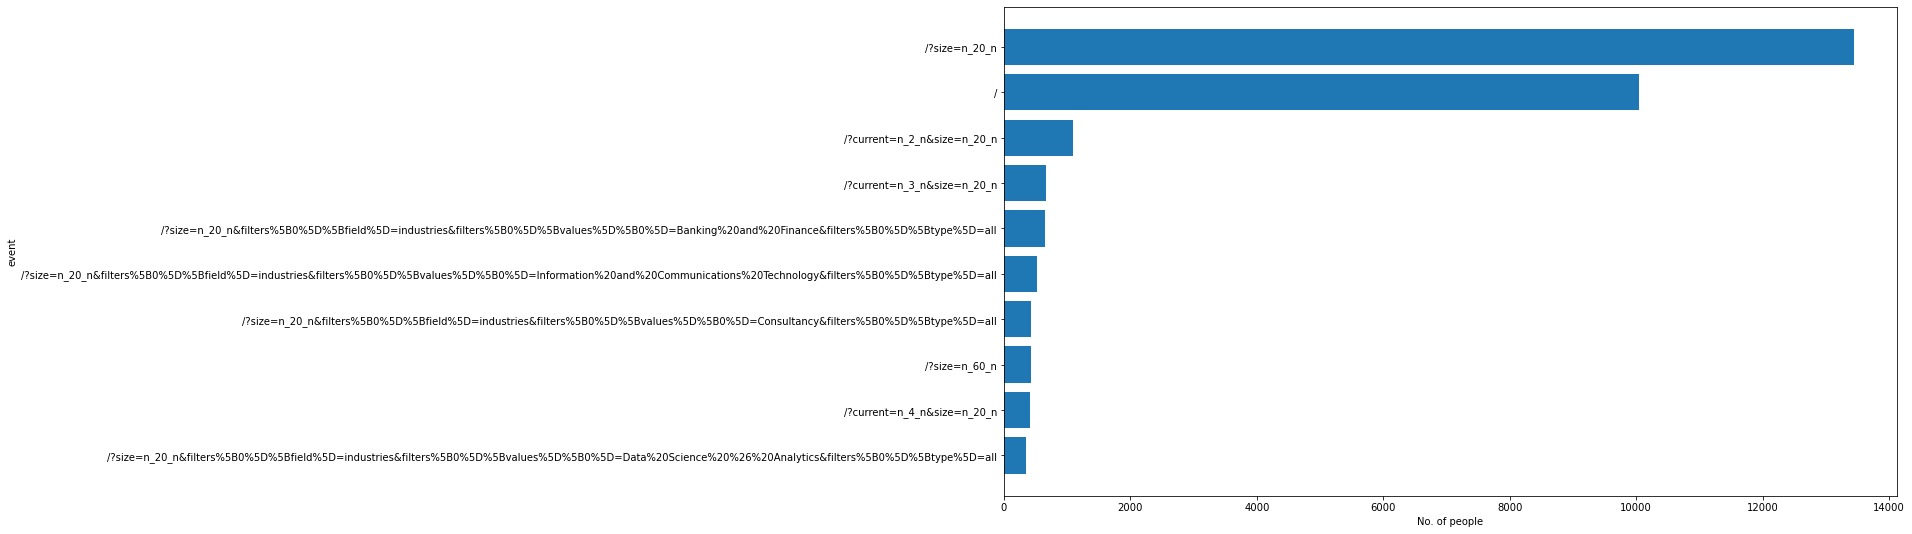

In [93]:
import matplotlib.pyplot as plt
 
courses = list(d.iloc[:10][0])
values = list(d.iloc[:10][1])
courses = courses[::-1]  
values = values[::-1]

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(courses, values)

plt.ylabel("event")
plt.xlabel("No. of people")
plt.show()

In [95]:
sett

{0: set(),
 1: set(),
 2: set(),
 3: set(),
 4: set(),
 5: set(),
 6: set(),
 7: set(),
 8: set(),
 9: set(),
 10: set(),
 11: set(),
 12: set(),
 13: set(),
 14: set(),
 15: set(),
 16: set(),
 17: set(),
 18: set(),
 19: set(),
 20: set(),
 21: set(),
 22: set(),
 23: set(),
 24: set(),
 25: set(),
 26: set(),
 27: set(),
 28: set(),
 29: set(),
 30: set(),
 31: set(),
 32: set(),
 33: set(),
 34: set(),
 35: set(),
 36: set(),
 37: set(),
 38: set(),
 39: set(),
 40: set(),
 41: set(),
 42: set(),
 43: set(),
 44: set(),
 45: set(),
 46: set(),
 47: set(),
 48: set(),
 49: set(),
 50: set(),
 51: set(),
 52: set(),
 53: set(),
 54: set(),
 55: set(),
 56: set(),
 57: set(),
 58: set(),
 59: set(),
 60: set(),
 61: set(),
 62: set(),
 63: set(),
 64: set(),
 65: set(),
 66: set(),
 67: set(),
 68: set(),
 69: set(),
 70: set(),
 71: set(),
 72: set(),
 73: set(),
 74: set(),
 75: set(),
 76: set(),
 77: set(),
 78: set(),
 79: set(),
 80: set(),
 81: set(),
 82: set(),
 83: set(),
 8